In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
current_data = pd.read_csv('Titanic_dataset.csv')
current_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,female,4.0,0,2,22.0250,S,yes
1,2,male,30.0,0,0,13.0000,S,no
2,1,male,NaN,0,0,27.7208,C,no
3,3,female,14.0,0,0,7.8542,S,no
4,3,male,24.0,0,0,7.5500,S,yes
...,...,...,...,...,...,...,...,...
1173,1,female,36.0,1,2,120.0000,S,yes
1174,1,female,39.0,1,1,83.1583,C,yes
1175,3,male,23.0,0,0,7.0500,S,yes
1176,3,female,36.0,1,0,17.4000,S,yes


In [3]:
current_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1178 non-null   int64  
 1   Sex       1178 non-null   object 
 2   Age       905 non-null    float64
 3   SibSp     1178 non-null   int64  
 4   Parch     1178 non-null   int64  
 5   Fare      1177 non-null   float64
 6   Embarked  1178 non-null   object 
 7   Survived  1178 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 73.8+ KB


In [4]:
current_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

In [5]:
#Pclass => change the data type from int to string
current_data[['Pclass']] = current_data[['Pclass']].astype(str)
current_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1178 non-null   object 
 1   Sex       1178 non-null   object 
 2   Age       905 non-null    float64
 3   SibSp     1178 non-null   int64  
 4   Parch     1178 non-null   int64  
 5   Fare      1177 non-null   float64
 6   Embarked  1178 non-null   object 
 7   Survived  1178 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 73.8+ KB


In [6]:
current_data.describe()

,Age,SibSp,Parch,Fare
count,905.000000,1178.000000,1178.000000,1177.000000
mean,30.142541,0.488964,0.363328,32.943337
std,14.214484,1.014909,0.778042,52.129564
min,1.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,30.695800
max,80.000000,8.000000,9.000000,512.329200


In [ ]:
#Descriptive Statistic
#Make sure the numaric data is positive number

In [7]:
#Create list format
columns_data = current_data.columns.values.tolist()
columns_data 

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']

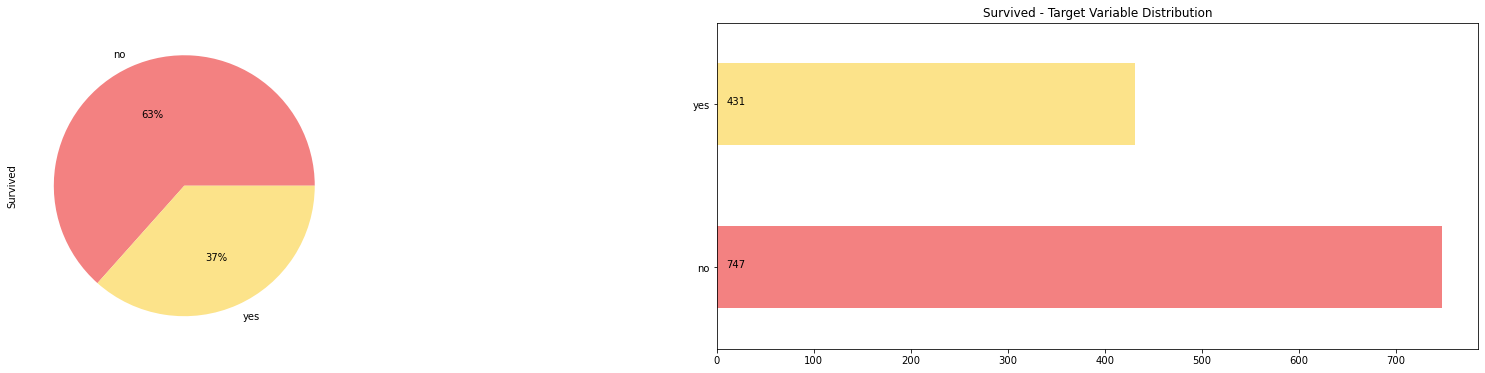

In [36]:
# Let's see how Target feature is distributed 
plt.figure(figsize=(30,6))
plt.subplot(121)
current_data.Survived.value_counts().plot(kind='pie', autopct = "%1.0f%%", colors=['#F38181','#FCE38A'])
plt.subplot(122)
ax = current_data.Survived.value_counts().plot(kind='barh', color=['#F38181','#FCE38A'])
for i,j in enumerate(current_data['Survived'].value_counts().values):
    ax.text(10,i,j)
plt.title('Survived - Target Variable Distribution')
plt.show()

In [13]:
###data type

# which columns are object
data_obj_cols = list(current_data.select_dtypes(include='object'))
print('data_obj_cols : ',len(data_obj_cols))

# the nunmeric type
data_numeric_cols = list(current_data.select_dtypes(include=['float64','int64']))
print('data_numeric_cols : ',len(data_numeric_cols))

# how these are distributed for object columns
columns_data[(columns_data == 'current_data')]

data_obj_cols :  4
data_numeric_cols :  4
Pclass


In [14]:
# =============================================================================
# OBJECT ANALYSIS    
# =============================================================================
file = current_data
# file = file[file["TARGET"]==1.0]
# current_data[current_data['TARGET'] == 1]

In [16]:
def distributionGraphs(x):
    print("\033[1m\033[1;3mDistribution Based on "+str(x)+"\033[0m")
    print('Description : ',columns_data[(columns_data == 'current_data') & (columns_data == x)],'\n')
    
    #Create a normalized value count converted to percentage
    target_group = round(file.groupby('Survived')[x].value_counts(normalize=True,sort=False)*100)
    
    #cnt = int((target_group.count()))
    cnt = int((target_group.count()/2))
        
    all_colr = ['#F38181','#FCE38A','#EAFFD0','#95E1D3','#EEEEEE','#00ADB5']
    colors = all_colr[:cnt]
    plt.figure(figsize=(30,6))
    
    plt.subplot(121)
    plt.title(str(x)+' Distribution grouped by Target')
    ax = target_group.plot(kind='bar',color=colors)
    
    # A method to print values in Bar
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + bar.get_height()/2, str(bar.get_height()))
    
    plt.subplot(122)
    plt.title(str(x)+' distribution in Overall Records')
    (current_data[x].value_counts(normalize=True)*100).plot(kind='pie', autopct = "%1.0f%%", colors=colors)
    plt.ylabel(' ')

    plt.show()
    
    print("\033[1m\033[1;3mTable View\033[0m")
    print(target_group)
    print("\n\n")

Distribution Based on Pclass
Description :  Pclass 



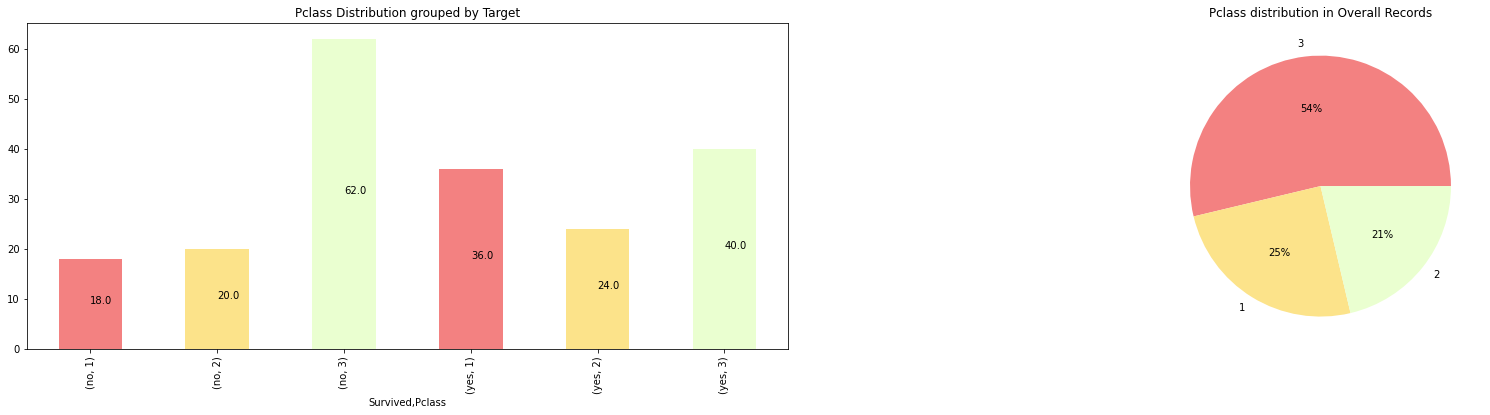

Table View
Survived  Pclass
no        1         18.0
          2         20.0
          3         62.0
yes       1         36.0
          2         24.0
          3         40.0
Name: Pclass, dtype: float64



Distribution Based on Sex
Description :  Pclass 



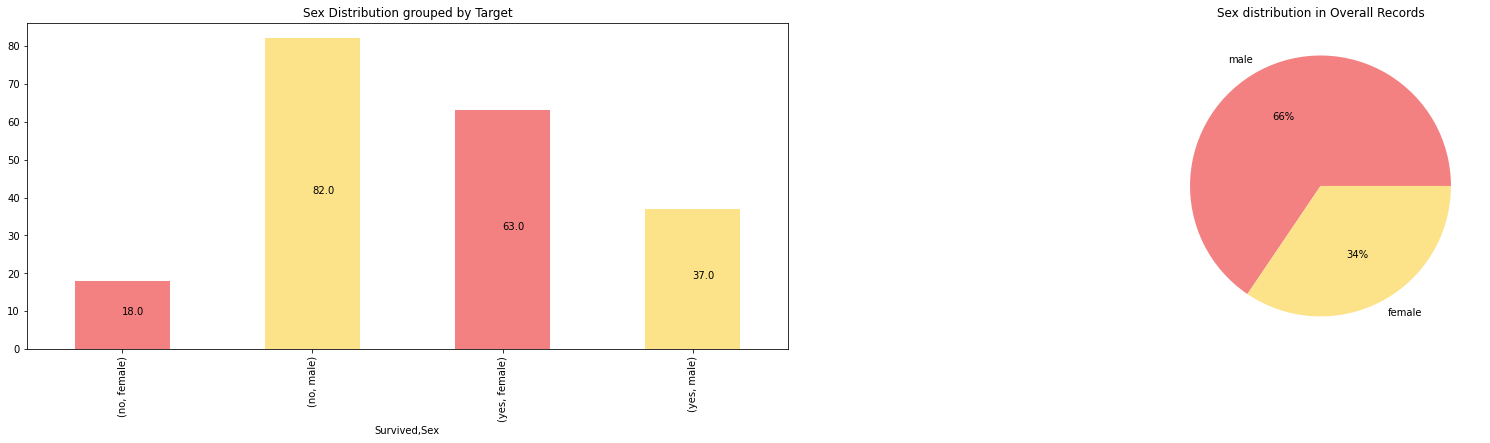

Table View
Survived  Sex   
no        female    18.0
          male      82.0
yes       female    63.0
          male      37.0
Name: Sex, dtype: float64



Distribution Based on Embarked
Description :  Pclass 



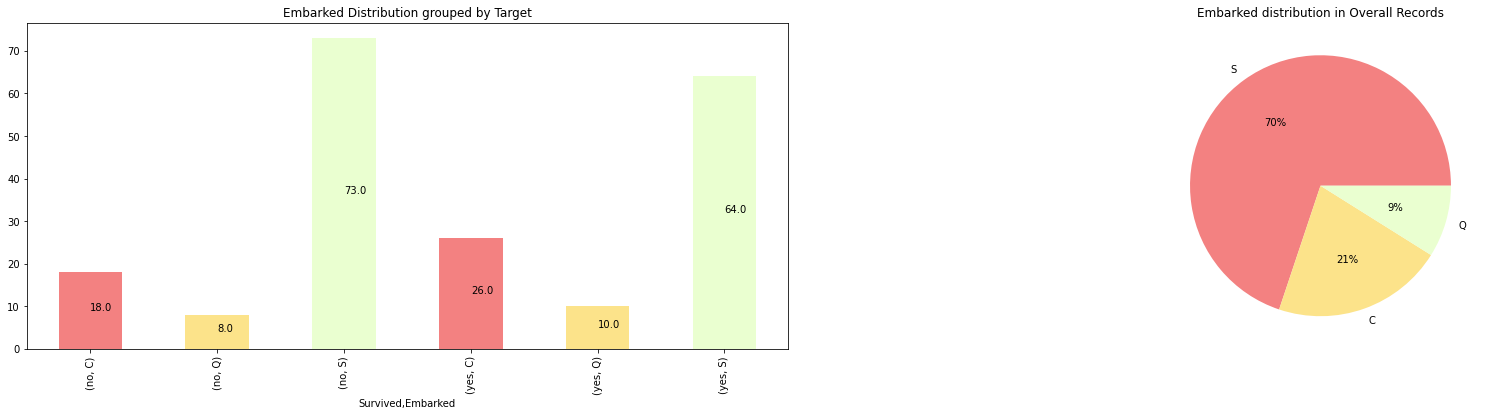

Table View
Survived  Embarked
no        C           18.0
          Q            8.0
          S           73.0
yes       C           26.0
          Q           10.0
          S           64.0
Name: Embarked, dtype: float64





In [18]:
for feature in data_obj_cols[:-1]: #add column list numbers to control [1:2]
# for feature in data_obj_cols[10:11]:
    distributionGraphs(feature)

In [27]:
# =============================================================================
# NUMERICAL ANALYSIS
# =============================================================================
##REMOVING THE COLUMNS WITH NAME STARTING WITH"FLAG"
#Creating list of Flag columns and removing from numeric columns
data_numeric_cols
# data_numeric_cols = list(data_numeric_cols)

# data_flag_cols = [val for val in data_numeric_cols if 'FLAG_' in val]

['Age', 'SibSp', 'Parch', 'Fare']

In [34]:
# We have verified the distribution during the data cleaning stage. We'll create a function now to visualize the distribution of numeric values

def numericDistributionGraph(col):
    print("\033[1m\033[1;3mDistribution Based on "+str(col)+"\033[0m")
    print('Description : ',columns_data[(columns_data == 'application_data') & (columns_data == col)])
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(1,3,1)
    sns.histplot(current_data[col], bins=10, color='#222831')
    plt.title('Distribution of '+col, fontsize=8)
#     plt.title('Distribution of '+col+' Across current application', fontsize=8)
    
    plt.subplot(1,3,2)
    sns.boxplot(x='Survived', y=col ,data=current_data,)
    plt.title('Distribution of '+col+' with respect to Survived/target feature', fontsize=8)
#     plt.title('Distribution of '+col+' with respect to Survived/target feature', fontsize=8)
    
    plt.subplot(1,3,3)
    sns.boxplot(x=current_data[col],color='#F38181')
    plt.title('Distribution of '+col, fontsize=8)
#     plt.title('Distribution of '+col+' quantile Across current application', fontsize=8)

Distribution Based on Age
Description :  Pclass
Distribution Based on SibSp
Description :  Pclass
Distribution Based on Parch
Description :  Pclass
Distribution Based on Fare
Description :  Pclass


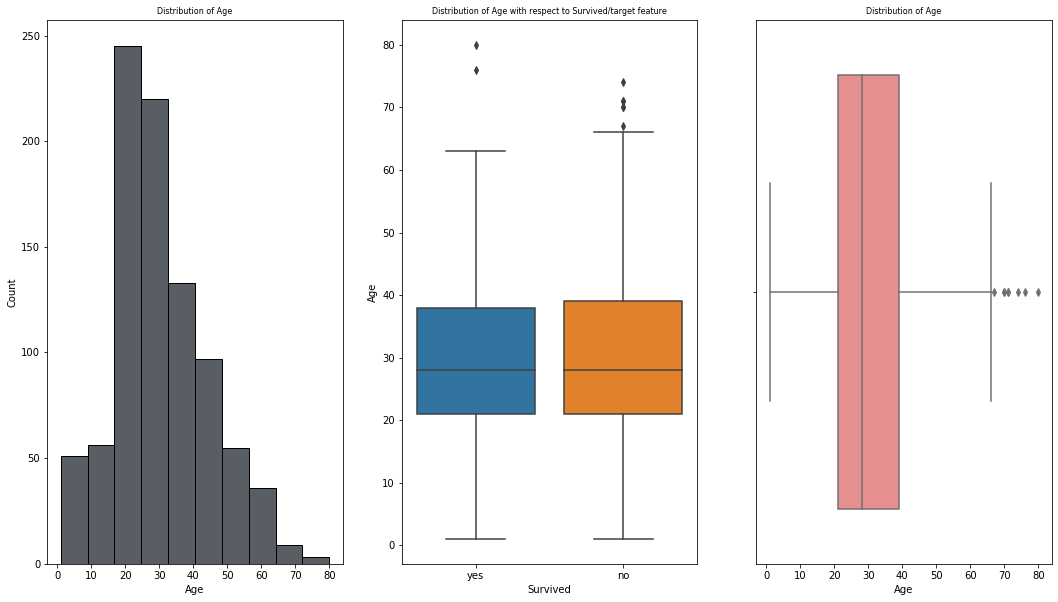

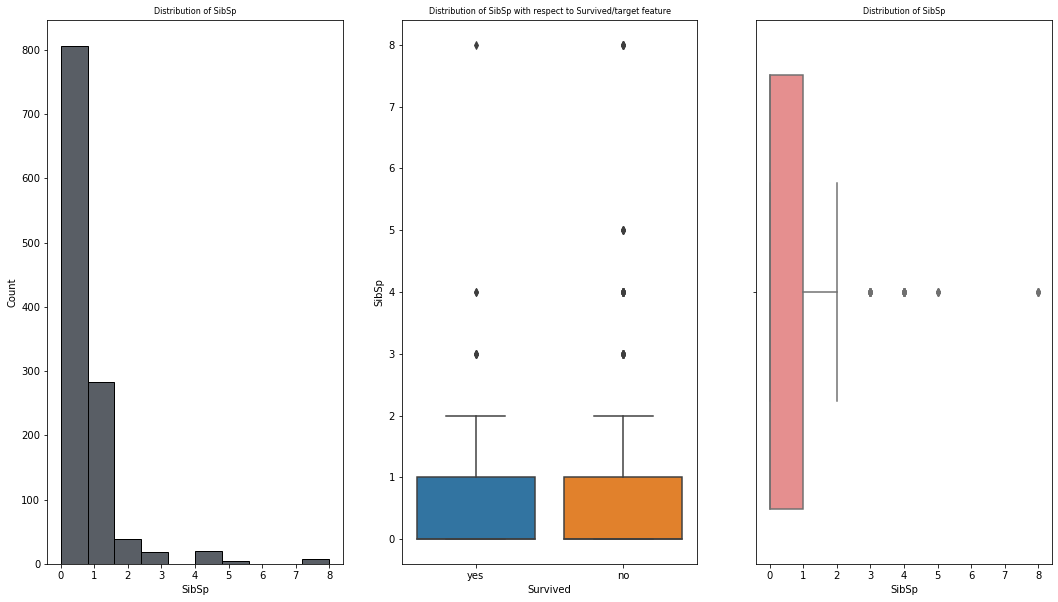

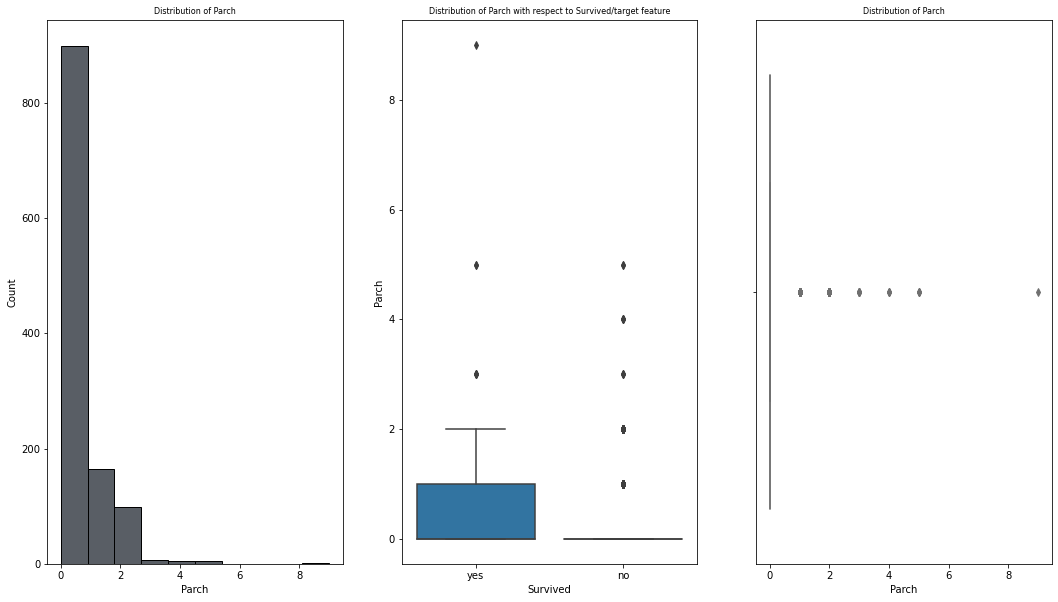

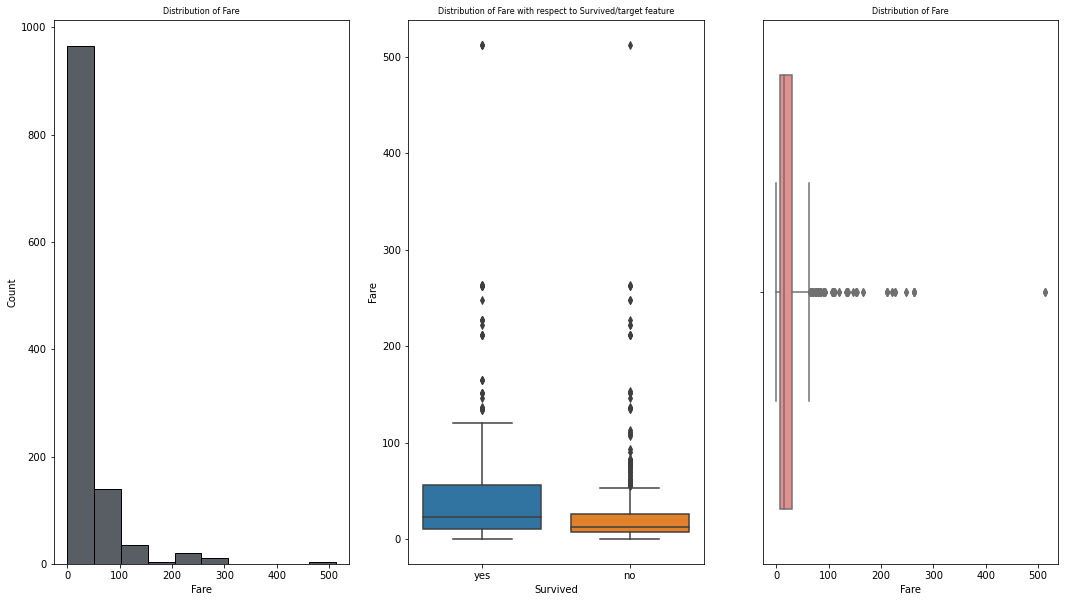

In [35]:
for col in data_numeric_cols[:]:
    numericDistributionGraph(col)